In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from scipy.optimize import curve_fit
from copy import deepcopy

In [2]:
sim=[]
N = 1200

for i in range(N):
    sim.append(pd.read_csv(f'data_local/sim2/job_{i}.txt', sep="\t",encoding='iso-8859-1', on_bad_lines='skip'))
    

In [3]:
lichtAn = pd.read_csv('data_local/TheoCanLightDark_lon.txt', sep='\t')
lichtAus = pd.read_csv('data_local/TheoCanLightDark_loff.txt', sep='\t')

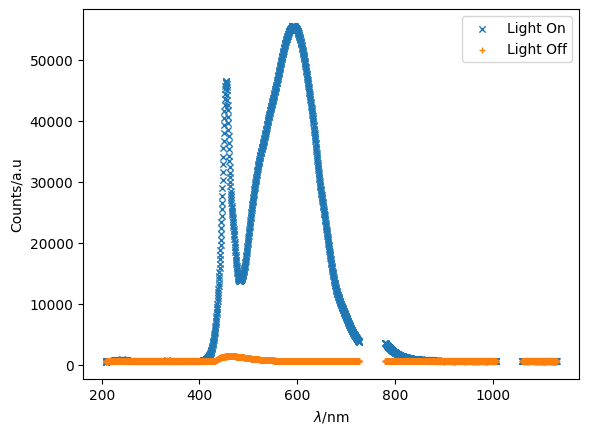

In [4]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

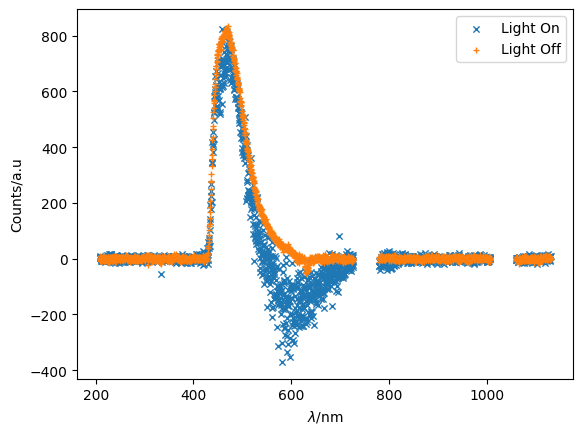

In [5]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]]-lichtAn[lichtAn.columns[1]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]]-lichtAus[lichtAus.columns[1]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

In [6]:
np.linspace(-6,31.8,15), np.linspace(-18,26.8,15)

(array([-6. , -3.3, -0.6,  2.1,  4.8,  7.5, 10.2, 12.9, 15.6, 18.3, 21. ,
        23.7, 26.4, 29.1, 31.8]),
 array([-18. , -14.8, -11.6,  -8.4,  -5.2,  -2. ,   1.2,   4.4,   7.6,
         10.8,  14. ,  17.2,  20.4,  23.6,  26.8]))

In [7]:
radialC = np.empty((15,15))
radialDC = np.empty((15,15))
for (i,h) in enumerate(np.linspace(-18,26.8,15)):
    for (j,v) in enumerate(np.linspace(-6,31.8,15)):
        # print(i,j,"   ",h,v.round(1))
        try:
            radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.1f}deg_v={v:.1f}deg_x=0mm.txt",sep="\t")
            radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.1f}deg_v={v:.1f}deg.txt",sep="\t")
        except:
            try:
                radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.0f}deg_v={v:.1f}deg_x=0mm.txt",sep="\t")
                radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.0f}deg_v={v:.1f}deg.txt",sep="\t")
            except:
                try:
                    radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.1f}deg_v={v:.0f}deg_x=0mm.txt",sep="\t")
                    radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.1f}deg_v={v:.0f}deg.txt",sep="\t")
                except:
                    radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.0f}deg_v={v:.0f}deg_x=0mm.txt",sep="\t")
                    radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.0f}deg_v={v:.0f}deg.txt",sep="\t")
        radialC[i,j] =  radC_[radC_.columns[-1]].sum()
        radialDC[i,j] =  radDC_[radDC_.columns[-1]].sum()

rad = (radialC - radialDC)/np.max((radialC - radialDC))

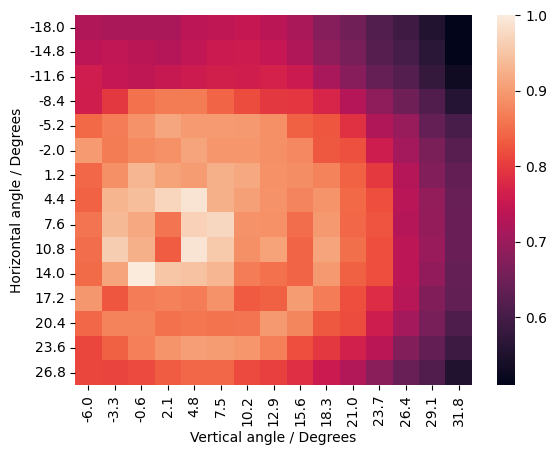

In [8]:
sns.heatmap(rad, yticklabels=np.linspace(-18,26.8,15).round(1), xticklabels=np.linspace(-6,31.8,15).round(1))
plt.xlabel('Vertical angle / Degrees')
plt.ylabel('Horizontal angle / Degrees');

In [9]:
sim[0].head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0


In [10]:
col = sim[0].columns

In [11]:
sim_ = sim[0]
for i in range(N):
    sim[i]['r_exit'] = np.sqrt(sim[i][col[0]]**2 + sim[i][col[1]]**2)
    sim_['r_exit'] = np.sqrt(sim_[col[0]]**2 + sim_[col[1]]**2)
    sim[i] = sim[i][((sim[i]['r_exit']<0.125) & (sim[i]['rayleighScatterings']==0.0))]

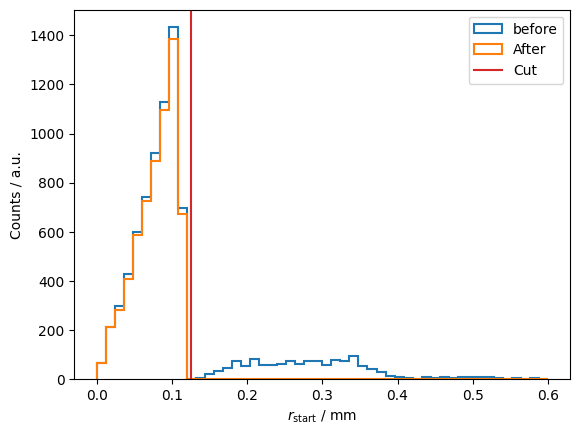

In [12]:
counts, bins, stff = plt.hist(sim_['r_exit'],histtype='step', bins=50, linewidth=1.5, label='before',range=(0, 0.6))
plt.hist(sim[0]['r_exit'],histtype='step', bins=bins, linewidth=1.5, label='After');
plt.axvline(x=0.125, label='Cut', c='tab:red')
plt.xlabel(r"$r_{\mathrm{start}}$ / mm")
plt.ylabel("Counts / a.u.")
plt.legend();

In [13]:
simKern = []
simMantel = []

for i in range(N):
    simKern.append(deepcopy(sim[i][(sim[i]['length_clad']==0.0)]))
    simMantel.append(deepcopy(sim[i][(sim[i]['length_clad']!=0.0)]))


In [14]:
for i in range(N):
    simKern[i]['thetha'] = np.arccos(simKern[i]['px_start'])
    simMantel[i]['thetha'] = np.arccos(simMantel[i]['px_start'])

In [15]:
dfK = deepcopy(simKern[0])
dfM = deepcopy(simMantel[0])

for i in range(49):
    dfK = pd.concat((dfK, simKern[i+1]))
    dfM = pd.concat((dfM, simMantel[i+1]))

In [16]:
nC = 1.60
n1 = 1.49
n2 = 1.42

theta1 = np.arccos(n1/nC)*180/np.pi
theta2 = np.arccos(n2/nC)*180/np.pi
print(theta1, theta2)

21.36948696857144 27.43924015068111


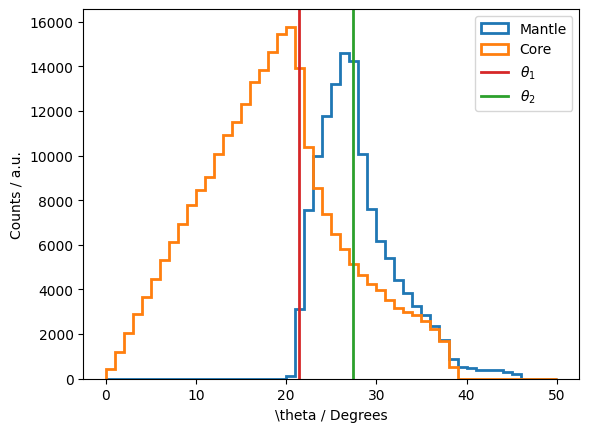

In [17]:
counts, bins, stf = plt.hist(dfM['thetha']*180/np.pi, bins=50, histtype='step', label='Mantle', linewidth=2, range=(0,50))
plt.hist(dfK['thetha']*180/np.pi, bins=bins, histtype='step', linewidth=2,label='Core');
plt.axvline(x=theta1, label=r'$\theta_1$', linewidth=2, c='tab:red')
plt.axvline(x=theta2, label=r'$\theta_2$', linewidth=2, c='tab:green')


plt.xlabel(r"\theta / Degrees")
plt.ylabel("Counts / a.u.")
plt.legend();

In [18]:
def r_min(x,y,z,px,py,pz):
    return np.sqrt((z*py)**2 + (pz*y)**2)/np.sqrt(pz**2 + py**2)

In [19]:
simK = deepcopy(simKern[0])
simM = deepcopy(simMantel[0])

for i in range(N-1):
    simK = pd.concat((simK, simKern[i+1]))
    simM = pd.concat((simM, simMantel[i+1]))

In [20]:
simK['r_min'] = r_min(simK['x_start'].to_numpy(),simK['y_start'].to_numpy(),simK['z_start'].to_numpy(), simK['px_start'].to_numpy(),simK['py_start'].to_numpy(),simK['pz_start'].to_numpy())
simM['r_min'] = r_min(simM['x_start'].to_numpy(),simM['y_start'].to_numpy(),simM['z_start'].to_numpy(), simM['px_start'].to_numpy(),simM['py_start'].to_numpy(),simM['pz_start'].to_numpy())

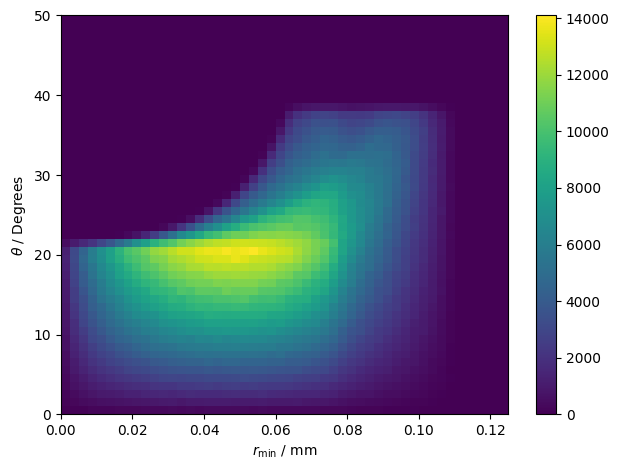

In [21]:
plt.hist2d(simK['r_min'],simK['thetha']*180/np.pi,bins=(50,50), range=[[0,0.125],[0,50]]);
plt.colorbar()
plt.xlabel(r'$r_{\mathrm{min}}$ / mm')
plt.ylabel(r"$\theta$ / Degrees")
plt.tight_layout();

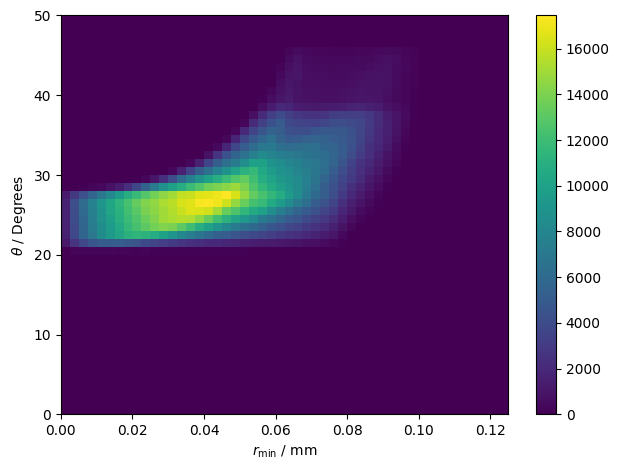

In [22]:
plt.hist2d(simM['r_min'],simM['thetha']*180/np.pi,bins=(50,50),range=[[0,0.125],[0,50]]);
plt.colorbar()
plt.xlabel(r'$r_{\mathrm{min}}$ / mm')
plt.ylabel(r"$\theta$ / Degrees")
plt.tight_layout();

In [23]:
df = pd.concat((simK, simM))

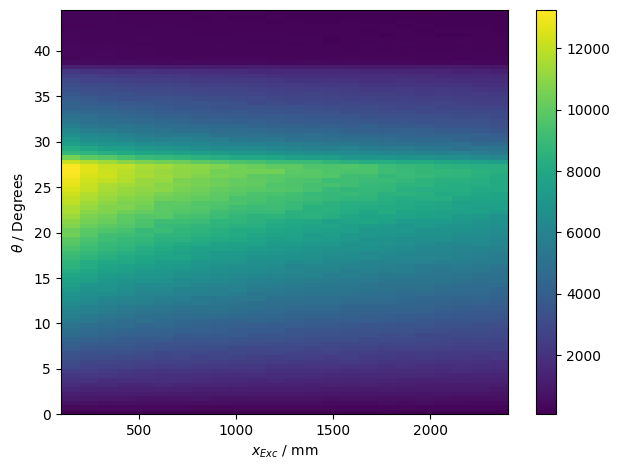

In [24]:
h = plt.hist2d(df['gpsPosX'],df['thetha']*180/np.pi,bins=(24,89), range=[[100,2400],[0,44.5]]);
plt.colorbar()
plt.xlabel(r'$x_{Exc}$ / mm')
plt.ylabel(r"$\theta$ / Degrees")
plt.tight_layout();

In [25]:
# H = plt.hist2d(simK['gpsPosX'],simK['thetha']*180/np.pi,bins=(24,90));
# plt.colorbar()
# plt.xlabel(r'$r_{\mathrm{min}}$ / mm')
# plt.ylabel(r"$\theta$ / Degrees")
# plt.tight_layout();

In [26]:
theta = np.zeros(45)
for i in range(45):
    theta[i] = h[2][2*i+1]
theta


array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5])

In [27]:
I =  np.zeros(24)

thet = 0.5

for j in range(24):
    I[j] = df['gpsPosX'][(df['thetha']*180/np.pi>(thet-0.5)) & (df['thetha']*180/np.pi<(thet+0.5)) & (df['gpsPosX'] == np.linspace(100,2400,24)[j])].count()

In [28]:
I, theta

(array([535., 540., 475., 468., 452., 479., 456., 416., 410., 420., 425.,
        423., 401., 367., 387., 365., 337., 402., 394., 335., 315., 337.,
        317., 326.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5]))

In [34]:
def func(x, I_0, a):
    return I_0 * np.exp(-a * x)

In [41]:
I =  np.zeros(24)

for j in range(24):
    I[j] = df['gpsPosX'][(df['thetha']*180/np.pi>(theta[20]-0.5)) & (df['thetha']*180/np.pi<(theta[20]+0.5)) & (df['gpsPosX'] == np.linspace(100,2400,24)[j])].count()

popt, pcov = curve_fit(func, np.linspace(100,2400,24), I, p0=(24000,2*10**-4))

In [42]:
np.linspace(100,2400,24), I, popt

(array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
        1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
        1900., 2000., 2100., 2200., 2300., 2400.]),
 array([20999., 20069., 19536., 19137., 18383., 18011., 17629., 17266.,
        16949., 16564., 16418., 15928., 15679., 15339., 15205., 14915.,
        14474., 14311., 14077., 13983., 13640., 13547., 13369., 12980.]),
 array([2.06045250e+04, 2.01038886e-04]))

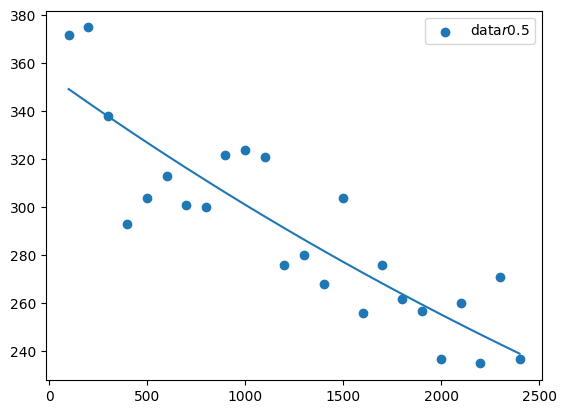

In [46]:
plt.scatter(np.linspace(100,2400,24), I, label=fr'data$r${thet}')
plt.plot(np.linspace(100,2400,24), func(np.linspace(100,2400,24), popt[0], popt[1]))
plt.legend()

In [64]:
# I= df[(df['thetha']*180/np.pi>(theta[i]-0.5)) & (df['thetha']*180/np.pi<(theta[i]+0.5))].groupby('gpsPosX').count()['wl'].to_numpy()
# I

array([535, 540, 475, 468, 452, 479, 456, 416, 410, 420, 425, 423, 401,
       367, 387, 365, 337, 402, 394, 335, 315, 337, 317, 326])

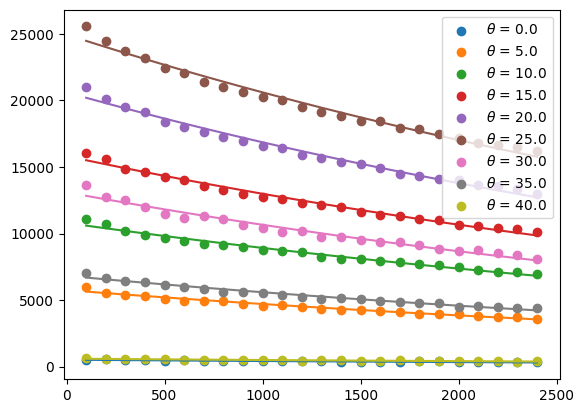

In [65]:
p = []
c = []
for i in range(45):
    I =  np.zeros(24)

    I= df[(df['thetha']*180/np.pi>(theta[i]-0.5)) & (df['thetha']*180/np.pi<(theta[i]+0.5))].groupby('gpsPosX').count()['wl'].to_numpy()

    popt, pcov = curve_fit(func, np.linspace(100,2400,24), I, p0=(24000,2*10**-4))
    p.append(popt)
    c.append(pcov)
    if (i%5==0):
        plt.scatter(np.linspace(100,2400,24), I, label=fr'$\theta$ = {theta[i]-0.5}')
        plt.plot(np.linspace(100,2400,24), func(np.linspace(100,2400,24), *popt))

plt.
plt.legend()


In [115]:
# p = []
# c = []
# for i in range(45):
#     I =  np.zeros(24)

#     for j in range(24):
#         I[j] = df['gpsPosX'][(df['thetha']*180/np.pi>(theta[i]-0.5)) & (df['thetha']*180/np.pi<(theta[i]+0.5)) & (df['gpsPosX'] == np.linspace(100,2400,24)[j])].count()

#     popt, pcov = curve_fit(func, np.linspace(100,2400,24), I, p0=(24000,2*10**-4))
#     p.append(popt)
#     c.append(pcov)
#     if (i%5==0):
#         plt.scatter(np.linspace(100,2400,24), I, label=fr'$\theta$ = {theta[i]-0.5}')
#         plt.plot(np.linspace(100,2400,24), func(np.linspace(100,2400,24), *popt))
# plt.legend()


In [109]:
def func2(x, a1, b):
    return a1/np.cos(x*np.pi/180) + b * np.tan(x*np.pi/180)

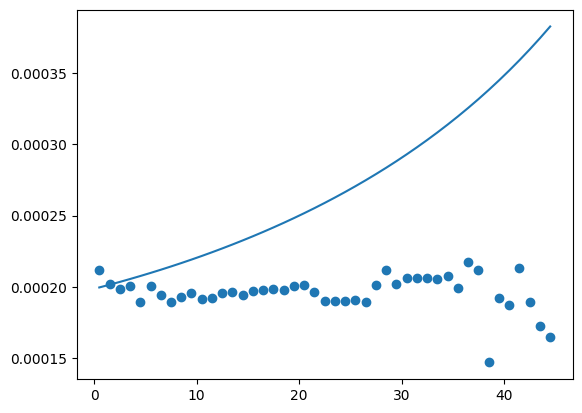

In [114]:
a = np.zeros(45)
for i in range(45):
    a[i] = p[i][1]
# popt, pcov = curve_fit(func2, theta, a)
# print(popt,func2(theta, *popt))
plt.scatter(theta, a, label='stf')
plt.plot(theta, func2(theta, a[0]-0.000013, a[0]/2))
plt.xlabel(r"$\theta$ / Degrees")
plt.xlabel()

In [ ]:
angleC = []
angleDC = []
for i in range(44):
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}.5deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}deg_v=0deg.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}.5deg_v=0deg.txt', sep='\t'))